In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [8]:
data= pd.read_csv("D:\RVU\Semester-5\IoT & EC\PrathamK_CP3_IoT\PrathamK_CP3_IoT\gender.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    Gender           131 non-null    object
 1    Age              131 non-null    int64 
 2    Height (cm)      131 non-null    int64 
 3    Weight (kg)      131 non-null    int64 
 4    Occupation       131 non-null    object
 5    Education Level  131 non-null    object
 6    Marital Status   131 non-null    object
 7    Income (USD)     131 non-null    int64 
 8    Favorite Color   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [9]:
data = data.drop(" Income (USD)",axis =1)

In [10]:
data

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,Yellow
...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,Yellow


In [11]:
data.columns = data.columns.str.strip()  # Removes leading/trailing whitespace from column names

In [12]:
data.Gender.value_counts()
# male = 1 , female = 0

male      68
female    63
Name: Gender, dtype: int64

In [13]:
# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

Categorical columns: Index(['Gender', 'Occupation', 'Education Level', 'Marital Status',
       'Favorite Color'],
      dtype='object')


In [14]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows after label encoding
data.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Favorite Color
0,1,32,175,70,15,3,1,1
1,1,25,182,85,14,1,2,2
2,0,41,160,62,6,2,1,6
3,1,38,178,79,10,1,2,7
4,0,29,165,58,8,0,2,8


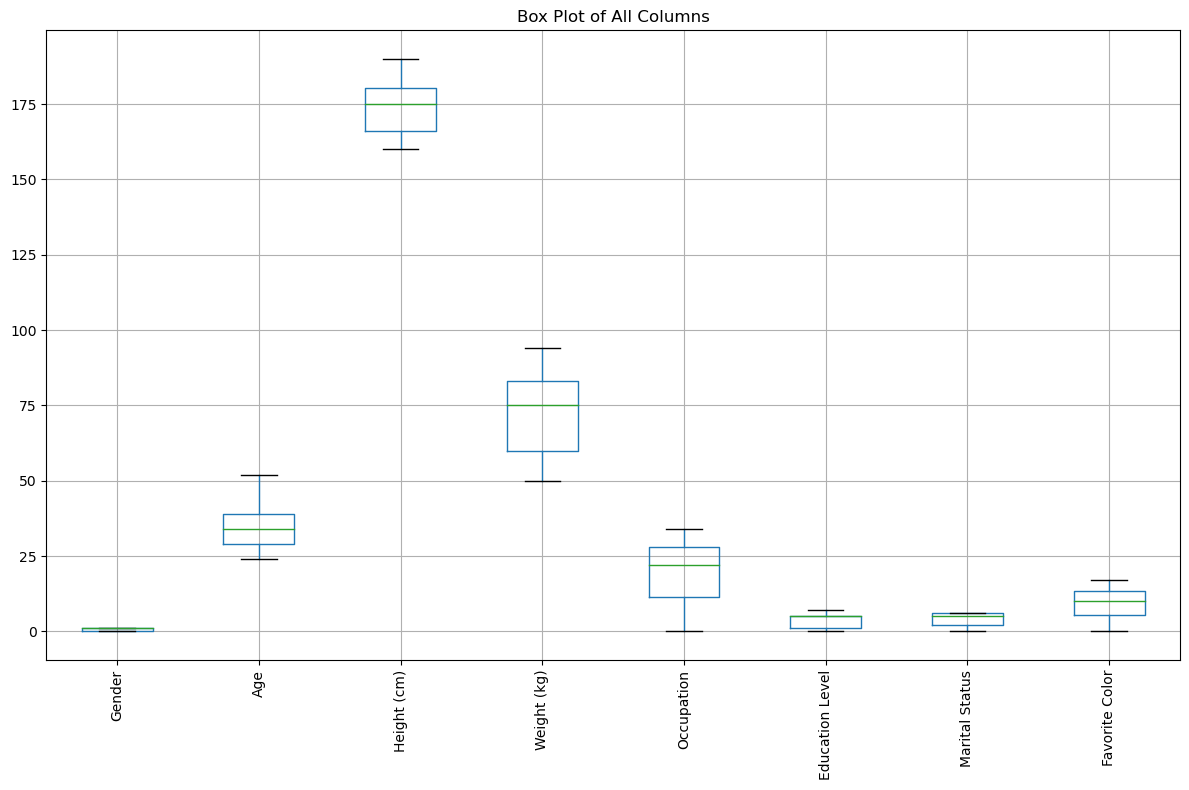

In [15]:
plt.figure(figsize=(12, 8))

# Create a box plot for all columns
data.boxplot()

# Add labels and title
plt.title('Box Plot of All Columns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
data.isna().sum()

Gender             0
Age                0
Height (cm)        0
Weight (kg)        0
Occupation         0
Education Level    0
Marital Status     0
Favorite Color     0
dtype: int64

In [18]:
data

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Favorite Color
0,1,32,175,70,15,3,1,1
1,1,25,182,85,14,1,2,2
2,0,41,160,62,6,2,1,6
3,1,38,178,79,10,1,2,7
4,0,29,165,58,8,0,2,8
...,...,...,...,...,...,...,...,...
126,0,32,170,64,29,4,6,13
127,1,38,176,79,30,5,5,9
128,0,27,162,55,25,4,6,11
129,1,33,175,77,31,5,5,17


In [19]:
print(data.columns)

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Education Level', 'Marital Status', 'Favorite Color'],
      dtype='object')


In [20]:
X = data.drop("Gender",axis=1)
y = data['Gender']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [22]:
NUM_OF_EPOCHS= 20
BATCH_SIZE = 15

In [23]:
import numpy as np
y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [24]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=NUM_OF_EPOCHS, validation_data=(X_val, y_val), batch_size=BATCH_SIZE)

Epoch 1/20
7/7 [==============================] - 0s 32ms/step - loss: 0.6870 - accuracy: 0.5481 - val_loss: 0.6900 - val_accuracy: 0.8571
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.7075 - accuracy: 0.5000 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.5673 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5000 - val_loss: 0.6801 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.5865 - val_loss: 0.6686 - val_accuracy: 0.9286
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6665 - accuracy: 0.6154 - val_loss: 0.6484 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - ETA: 0s - loss: 0.6450 - accuracy: 0.60 - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6923 - val_loss: 0.6186 - val_accuracy

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.9231
Test Accuracy: 0.9230769276618958


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8

In [28]:
model.save('Gender_cls.h5')

In [29]:
def representative_dataset():
    for _ in range(100):
      data =  X_test
      yield [data.astype(np.float32)]

print(representative_dataset())

<generator object representative_dataset at 0x000001D7EFE279A8>


In [31]:
# Converting a tf.Keras model to a TensorFlow Lite model.
# It is preferred to use TFLiteConverter from saved model and then
# Also provide representative dataset to train the converted TFLite model
# Avoid calling the TFLite converter directly from model
#converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf.saved_model.save(model, r"D:\RVU\Semester-5\IoT & EC\PrathamK_CP3_IoT\PrathamK_CP3_IoT")
converter = tf.lite.TFLiteConverter.from_saved_model(r"D:\RVU\Semester-5\IoT & EC\PrathamK_CP3_IoT\PrathamK_CP3_IoT")

# Though its size is not much, optimizer is used here to check whether it works on ESP32
# if this is chosen, tf.lite.Optimize.OPTIMIZE_FOR_SIZE, the TFLite does not work on ESP32
# Observed that even with Optimize.DEFAULT the TFLite model does not work on ESP32
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:\RVU\Semester-5\IoT & EC\PrathamK_CP3_IoT\PrathamK_CP3_IoT\assets


In [32]:
# Save the model in TFlite format whose size is just 5 KB
# It brings down the size from 49.52 KB to 3.836 KB, 13 times reduction
with open('Gender_Classification.tflite', 'wb') as f:
  f.write(tflite_model)

In [33]:
# Run the inference on TFLITE model on Python ... here itself first
# Let us now first try to run this tflinte model on Python itself
# Ref: https://www.tensorflow.org/lite/guide/inference
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Gender_Classification.tflite")
interpreter.allocate_tensors()

In [34]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'dense_input', 'index': 0, 'shape': array([1, 7]), 'shape_signature': array([-1,  7]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'Identity', 'index': 21, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [36]:
#Prediction of a few values 
#Both input1_data and input2_data where from teh original dataset itself

input1_data = [[32,175,70,15,3,1,1]]
print(input1_data)
input1_data = np.array(input1_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input1_data)

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output1_data = interpreter.get_tensor(output_details[0]['index'])
print('output1:')
print(output1_data)

#Actual label = class 1
# Verify if the same data is given to the original model what is the output
output1_data = model.predict(input1_data)
print(output1_data)

[[32, 175, 70, 15, 3, 1, 1]]
output1:
[[0.99996424]]
[[0.99996424]]


In [37]:
input2_data = [[32,175,70,15,3,1,13]]
print(input2_data)
input2_data = np.array(input2_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input2_data)

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output2_data = interpreter.get_tensor(output_details[0]['index'])
print('output2:')
print(output2_data)

#Actual label = class 0
# Verify if the same data is given to the original model what is the output
output2_data = model.predict(input2_data)
print(output2_data)

[[32, 175, 70, 15, 3, 1, 13]]
output2:
[[0.9999645]]
[[0.9999645]]


In [115]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained Keras model
model = load_model("Gender_Cls.h5")  # Replace with your model file

# Function to predict on a given input array
def predict(input_array):
    # Preprocess the input array (e.g., normalization if necessary)
    input_array = np.array(input_array, dtype=np.float32).reshape(1, -1)  # Reshape to match model's expected input

    # Run prediction
    prediction = model.predict(input_array)
    return prediction

# Example usage with input arrays
input1 = [32.0, 175.0, 70.0, 15.0, 3.0, 1.0, 1.0]  # Should output close to 1
input2 = [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]  # Should output close to 0

print("Prediction for input1:", predict(input1))
print("Prediction for input2:", predict(input2))


1/1 [==============================] - 0s 91ms/step
Prediction for input1: [[0.9999562]]
1/1 [==============================] - 0s 22ms/step
Prediction for input2: [[0.00039714]]


In [38]:
# Function to convert some hex values into an array for C programming
import time, sys

# Function to convert some hex values into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Pratham K \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n'

# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(128) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(64) + ';\n'
    c_str +=   'const int ' + 'DENSE3_SIZE' + ' = ' + str(32) + ';\n'
    c_str +=   'const int ' + 'DROPOUT1_RATE' + ' = ' + str(0.2) + ';\n'
    c_str +=   'const int ' + 'DENSE4_SIZE' + ' = ' + str(64) + ';\n'
    c_str +=   'const int ' + 'DROPOUT2_RATE' + ' = ' + str(0.3) + ';\n'
    c_str +=   'const int ' + 'DENSE5_SIZE' + ' = ' + str(128) + ';\n'
    c_str +=   'const int ' + 'DENSE6_SIZE' + ' = ' + str(1) + ';\n'

    # Add array length at the top of the file
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [39]:
# Write TFLite model to a C source (or header) file
with open("Gender_Classification" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "Gender_Classification"))

This model data was generated on: Sat Nov 16 13:41:30 2024
Tools used: Python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)] 
 Numpy: 1.21.5 
 TensorFlow: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)] 
 Keras:  2.4.0 


